# Assignment 6

## Generating values according to a probability distribution 

In this part of the assignment you will create a function to generate values of $x$ between 0 and 10 distributed according to 

$$ \frac{1}{\mathcal{N}} \left( 1 + \frac{2}{1+x^2}+ \sin(\sqrt{3 x})^2\right) $$

with 

$$ \mathcal{N} = \int\limits_0^{10} f(x) dx \;.$$

Let's first import the usual suspects:

In [2]:
import matplotlib.pyplot as plt
import numpy
import random

This defines the function:

In [3]:
norm = (181 + 24*numpy.arctan(10)-numpy.cos(2*numpy.sqrt(30))-2*numpy.sqrt(30)*numpy.sin(2*numpy.sqrt(30)))/12

def f(x):
    return  (1 + (2/(1+x**2)+ numpy.sin(numpy.sqrt(3*x))**2))/norm

This plots the function:

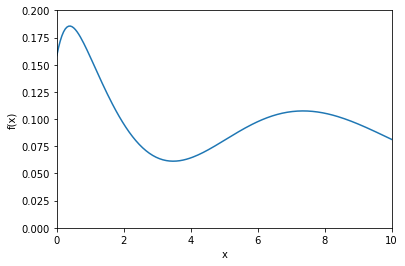

In [4]:
xs = numpy.linspace(0, 10, 200)
fs = f(xs)
plt.plot(xs, fs);
plt.ylabel('f(x)')
plt.xlabel('x')
plt.xlim(0,10)
plt.ylim(0,0.2);

Define a function `genSample` that generates a sample of `npts` values $x$ distributed according to $f(x)$. [5 marks]


In [5]:
def genSample(npts):
    sample = []
    
    randy = numpy.random.random(10*npts) * 0.2
    randx = numpy.random.random(10*npts) * 10
    randx_y=[randx,randy]
    for i in range(0,10*npts):
        if len(sample)==npts:
            break
        if 0<randx_y[1][i]<f(randx_y[0][i]):
            sample.append(randx_y[0][i])
    return numpy.array(sample)
print(genSample(10))



[6.08769967e+00 2.61929572e-01 9.72979304e+00 4.12150621e-01
 3.33010617e+00 6.51047186e+00 7.54668809e-02 8.45105784e-03
 3.06063426e+00 7.31815482e-01]


In [6]:
# this test is worth 1 mark
testSample = genSample(103)
assert (testSample >= 0).all() 
assert (testSample <= 10).all()
assert len(testSample) == 103

## Plotting task

Make a plot to show that the values generated are distributed in the right manner. The plot should have a title and axis labels. [4 marks]


CPU times: user 1.43 s, sys: 24.1 ms, total: 1.45 s
Wall time: 1.47 s


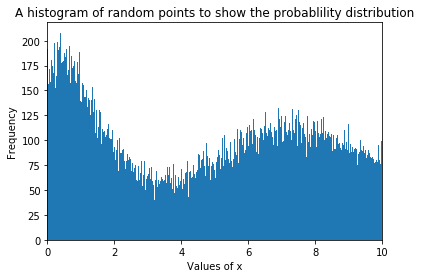

In [7]:
%%time
plt.hist(genSample(100000), 1000)
plt.ylabel('Frequency')
plt.xlim(0,10)
plt.xlabel('Values of x')
plt.title('A histogram of random points to show the probablility distribution')